In [12]:
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 12
time = np.arange(5*365 + 1) # 5 years

In [13]:
def plot_series(time, series, format = '-', start = 0, end = None, label = None, color = None):
    plt.plot(time[start:end], series[start:end], format, label = label, color = color)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize = 14)
    plt.grid(True)

def trend(time, slope = 0):
    return slope * time

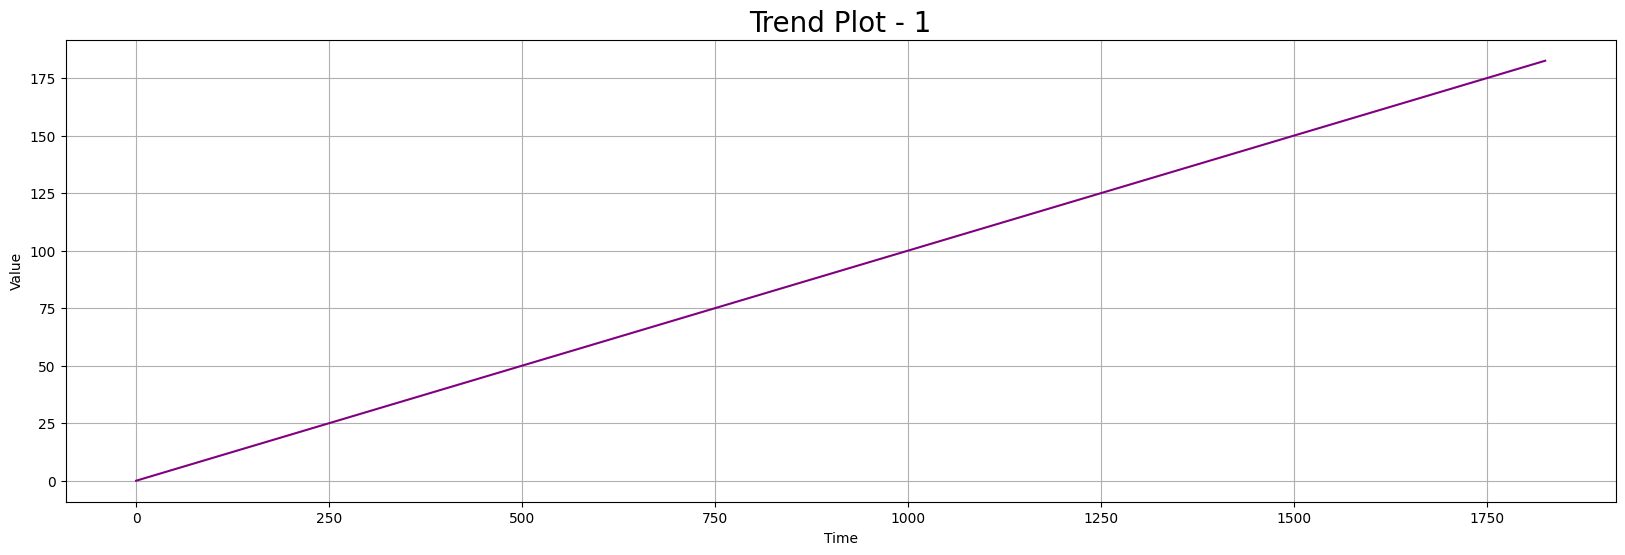

In [14]:
# Trend Plot 1
slope = 0.1
series = trend(time, slope)
plt.figure(figsize = (20, 6))
plot_series(time, series, color = "purple")
plt.title("Trend Plot - 1", fontdict = {'fontsize' : 20})
plt.show()

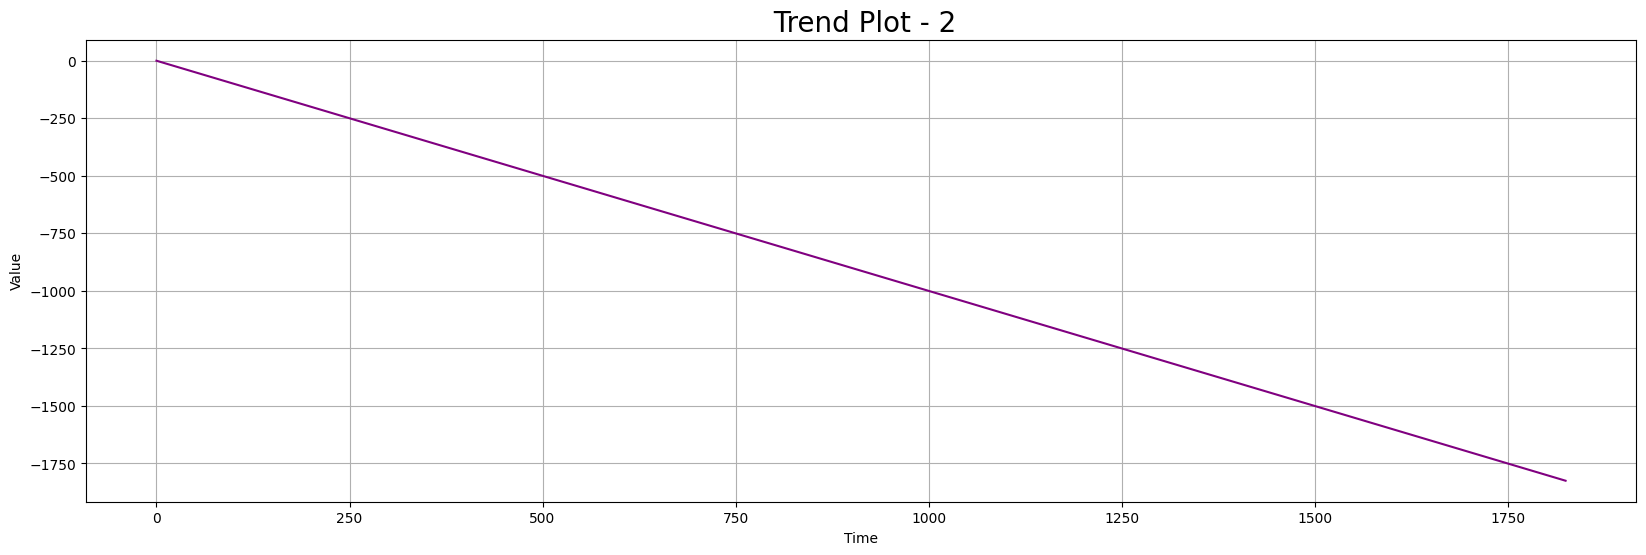

In [17]:
# Trend Plot 2
slope = -1
series = trend(time, slope)
plt.figure(figsize = (20, 6))
plot_series(time, series, color = "purple")
plt.title(" Trend Plot - 2", fontdict = {'fontsize' : 20})
plt.show()

In [18]:
# Seasonality
def seasonal_pattern(season_time):
    return np.where(season_time < 0.45,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude = 1, phase = 0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

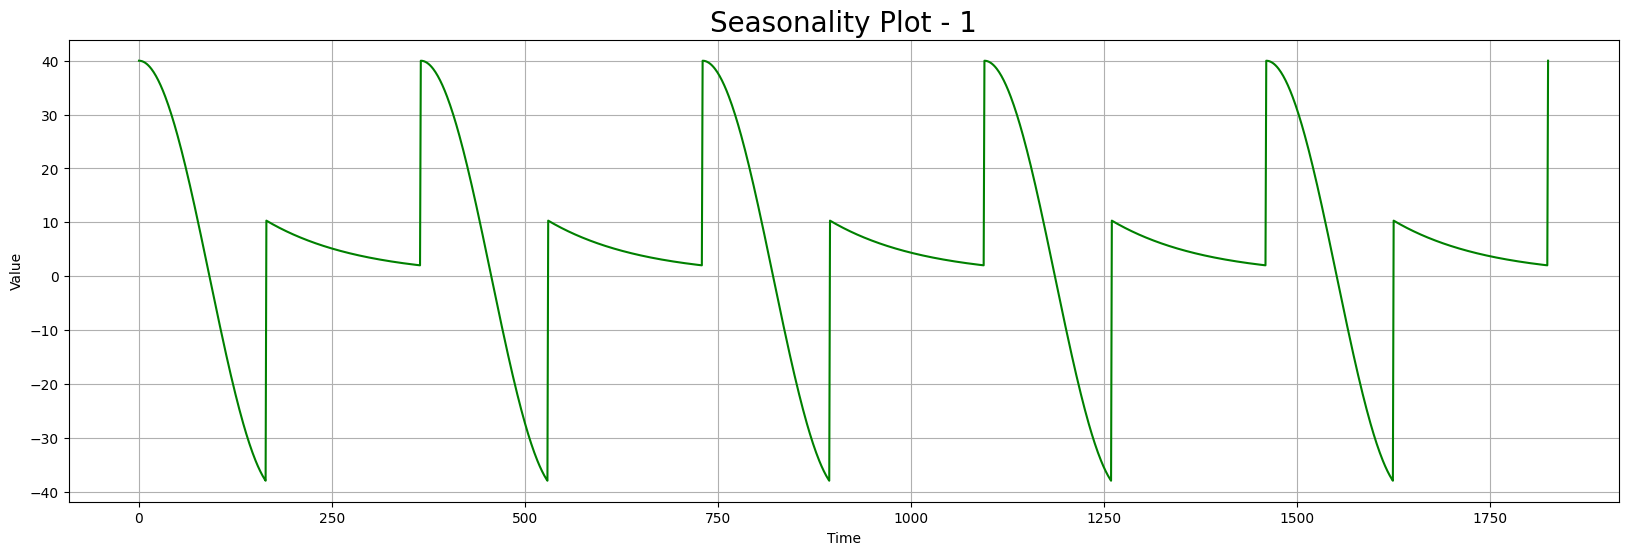

In [19]:
# Seasonality Plot 1
amplitude = 40
series = seasonality(time, period = 365, amplitude = amplitude, phase = 0)
plt.figure(figsize = (20, 6))
plot_series(time, series, color = "green")
plt.title("Seasonality Plot - 1", fontdict = {'fontsize' : 20})
plt.show()

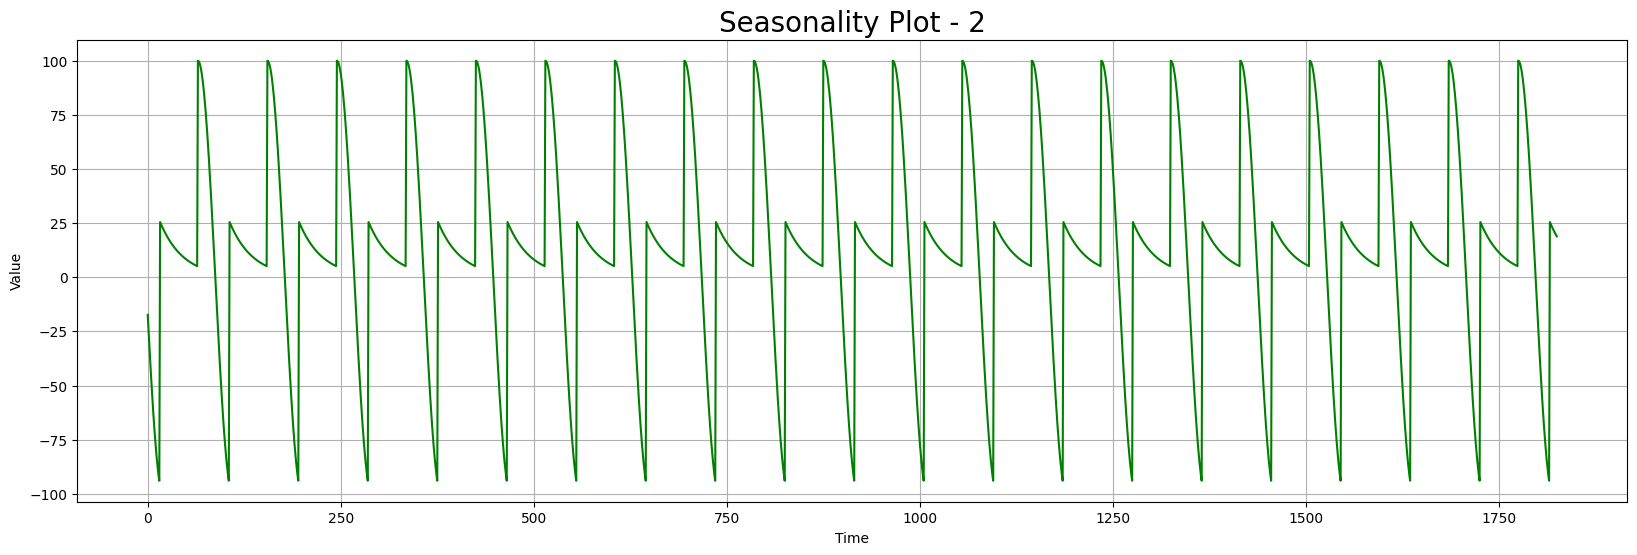

In [20]:
# Seasonality Plot 2
amplitude = 100
series = seasonality(time, period = 90, amplitude = amplitude, phase = 25)
plt.figure(figsize = (20, 6))
plot_series(time, series, color = "green")
plt.title("Seasonality Plot - 2", fontdict = {'fontsize' : 20})
plt.show()

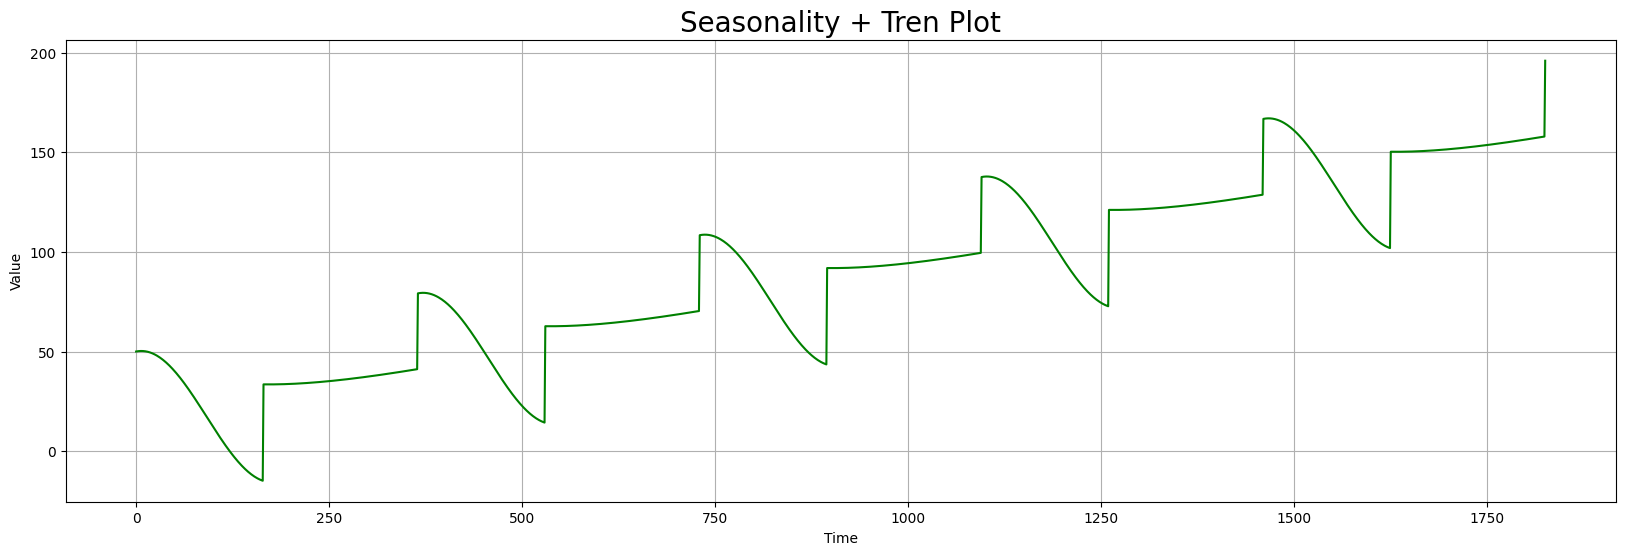

In [22]:
# Seasonality + Trend
baseline = 10
slope = 0.08
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude = amplitude)
plt.figure(figsize = (20, 6))
plot_series(time, series, color = "green")
plt.title("Seasonality + Tren Plot", fontdict = {'fontsize' : 20})
plt.show()

In [23]:
# Noise
def white_noise(time, noise_level = 1, seed = None):
    random = np.random.RandomState(seed)
    return random.random(len(time)) * noise_level

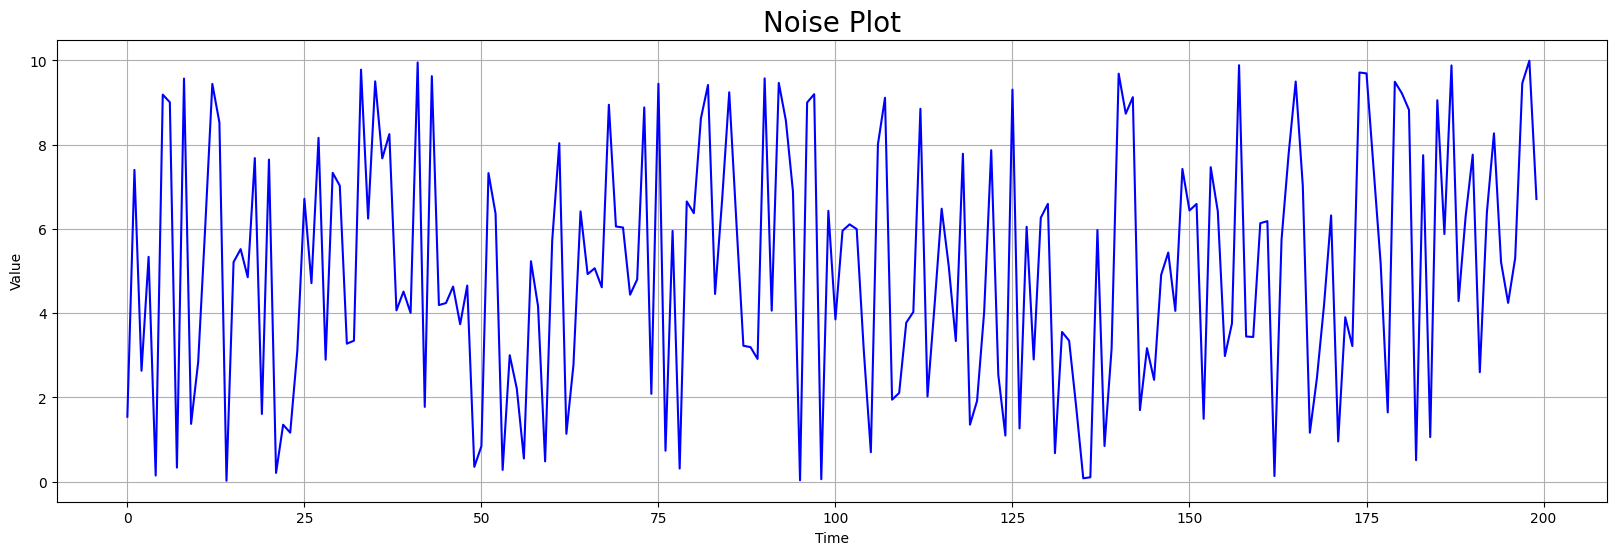

In [24]:
noise_level = 10
noise = white_noise(time, noise_level, seed = RANDOM_SEED)
plt.figure(figsize = (20, 6))
plot_series(time[:200], noise[:200], color = "blue")
plt.title("Noise Plot", fontdict = {'fontsize' : 20})
plt.show()

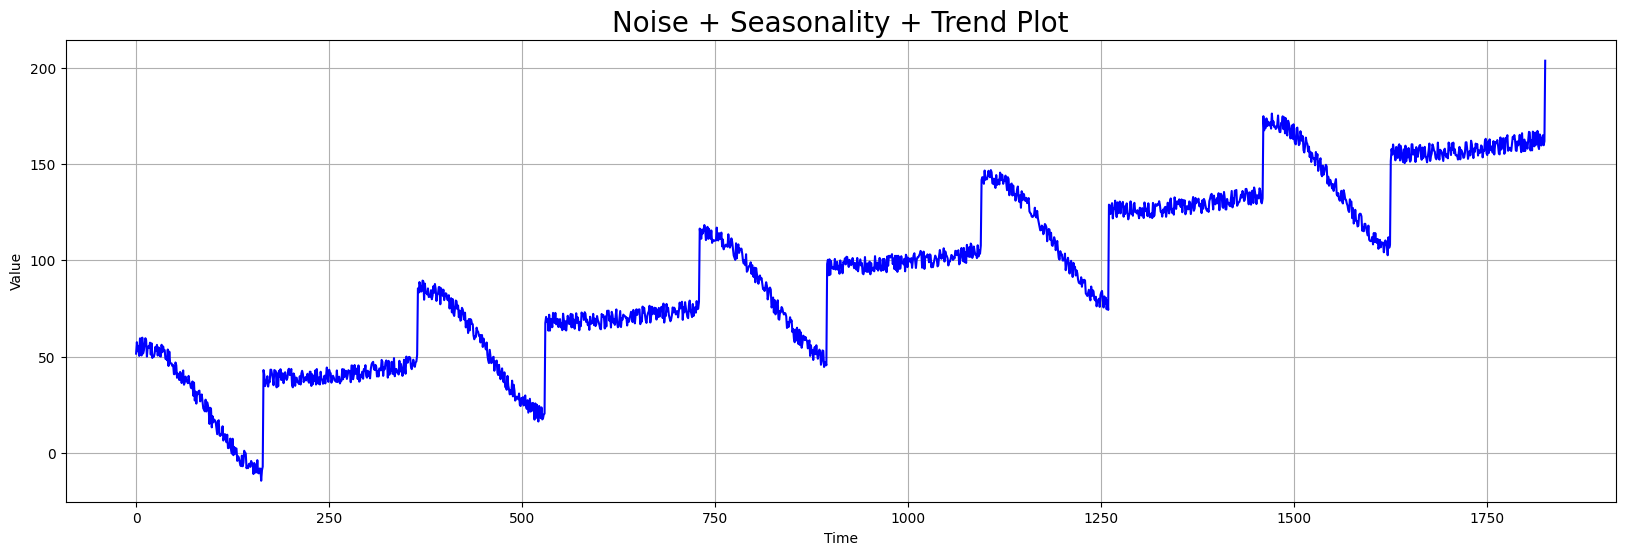

In [25]:
# Noise + Seasonality + Trend
series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude = amplitude)
series += white_noise(time, noise_level = 10, seed = RANDOM_SEED)
plt.figure(figsize = (20, 6))
plot_series(time, series, color = "blue")
plt.title("Noise + Seasonality + Trend Plot", fontdict = {'fontsize' : 20})
plt.show()

In [26]:
def autocorrelation_1(time, amplitude, seed = None):
    rnd = np.random.RandomState(seed)
    a1 = 0.5
    a2 = -0.1
    rnd_ar = rnd.randn(len(time) + 50)
    rnd_ar[:50] = 100
    for step in range(50, len(time) + 50):
        rnd_ar[step] += a1 * rnd_ar[step - 50]
        rnd_ar[step] += a2 * rnd_ar[step - 33]
    return rnd_ar[50:] * amplitude

def autocorrelation_2(time, amplitude, seed = None):
    rnd = np.random.RandomState(seed)
    a1 = 0.8
    ar = rnd.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += a1 * ar[step - 1]
    return ar[1:] * amplitude

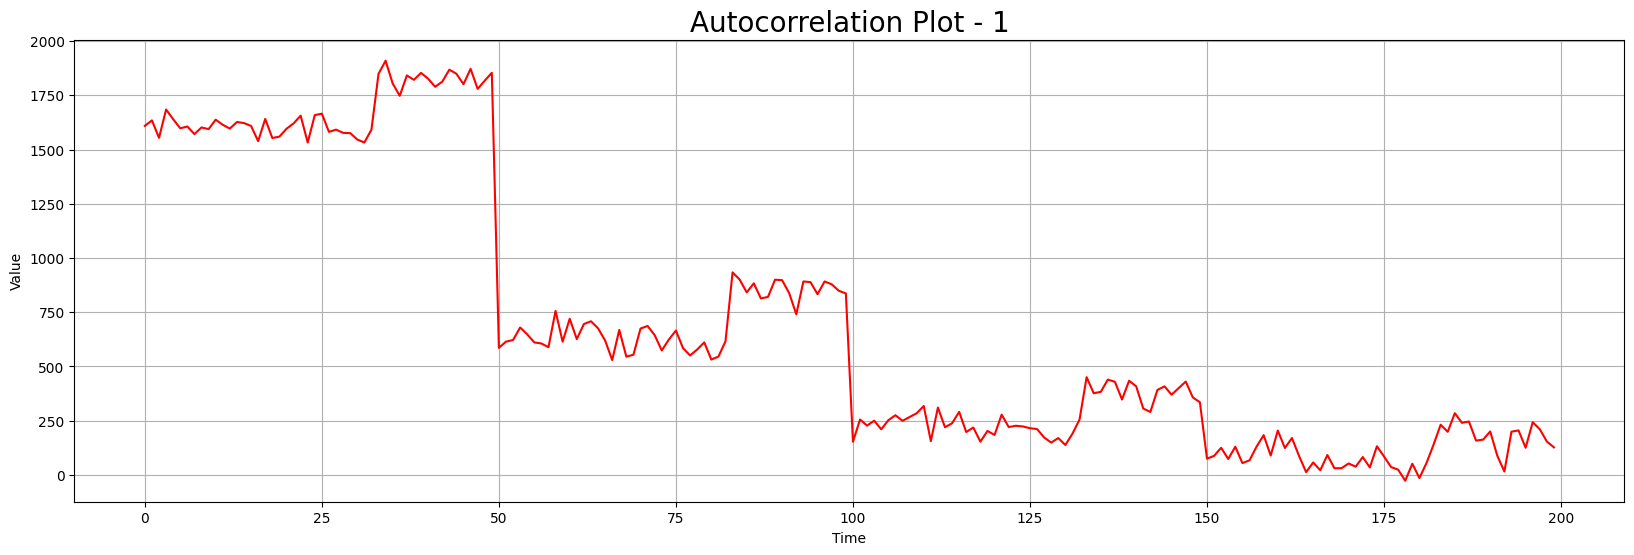

In [27]:
series = autocorrelation_1(time, amplitude, seed = RANDOM_SEED)
plt.figure(figsize = (20, 6))
plot_series(time[:200], series[:200], color = "red")
plt.title("Autocorrelation Plot - 1", fontdict = {'fontsize' : 20})
plt.show()

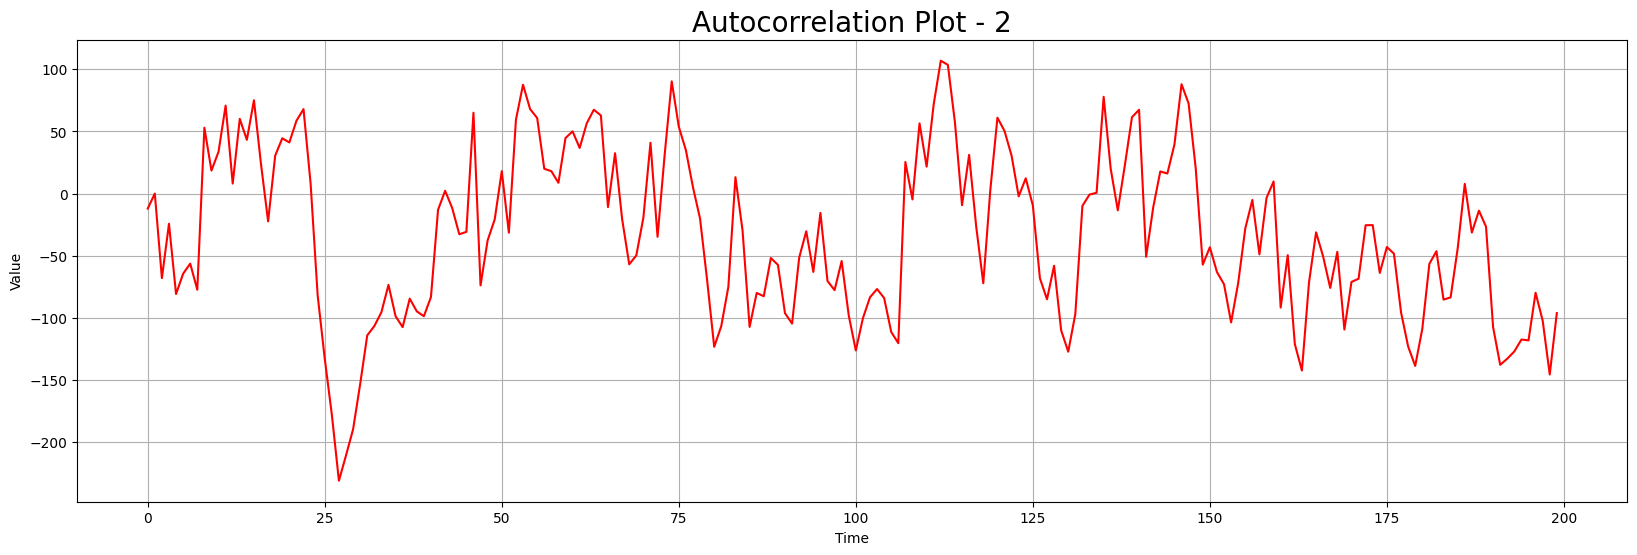

In [28]:
series = autocorrelation_2(time, amplitude, seed = RANDOM_SEED)
plt.figure(figsize = (20, 6))
plot_series(time[:200], series[:200], color = "red")
plt.title("Autocorrelation Plot - 2", fontdict = {'fontsize' : 20})
plt.show()

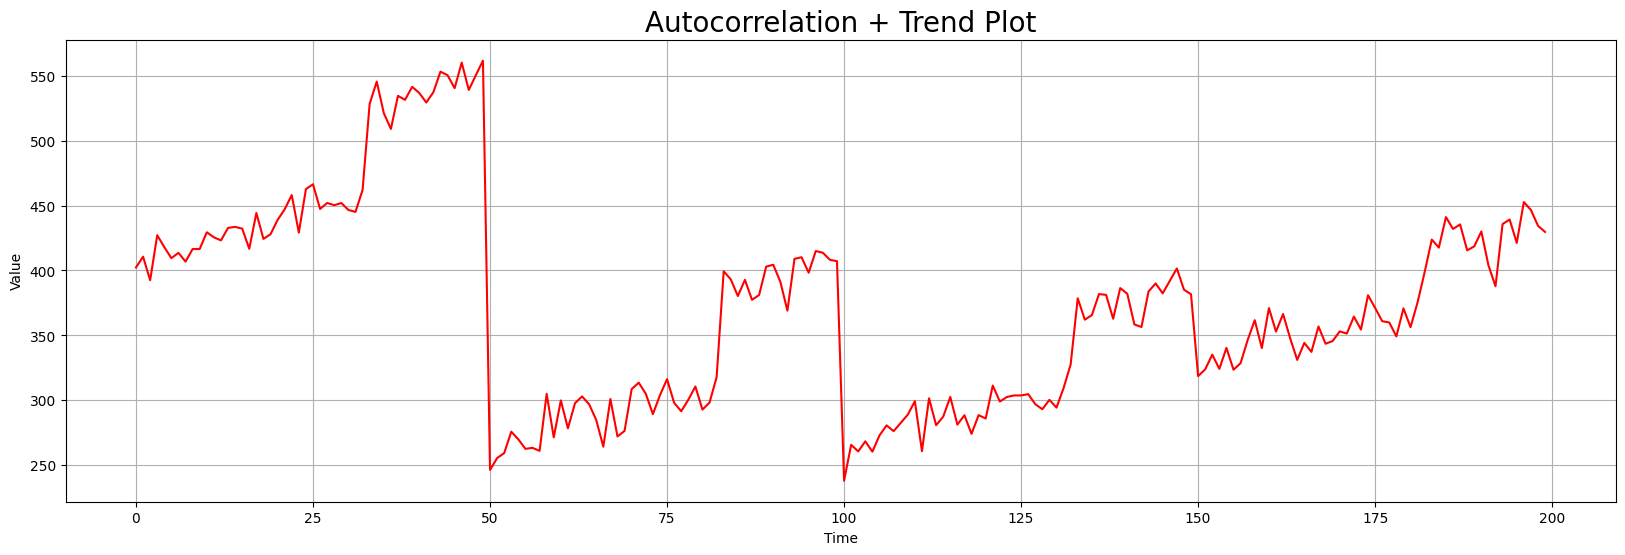

In [29]:
# Autocorrelation + Trend
amplitude = 10
slope = 2
series = autocorrelation_1(time, amplitude, seed = RANDOM_SEED) + trend(time, slope)
plt.figure(figsize = (20, 6))
plot_series(time[:200], series[:200], color = "red")
plt.title("Autocorrelation + Trend Plot", fontdict = {'fontsize' : 20})
plt.show()

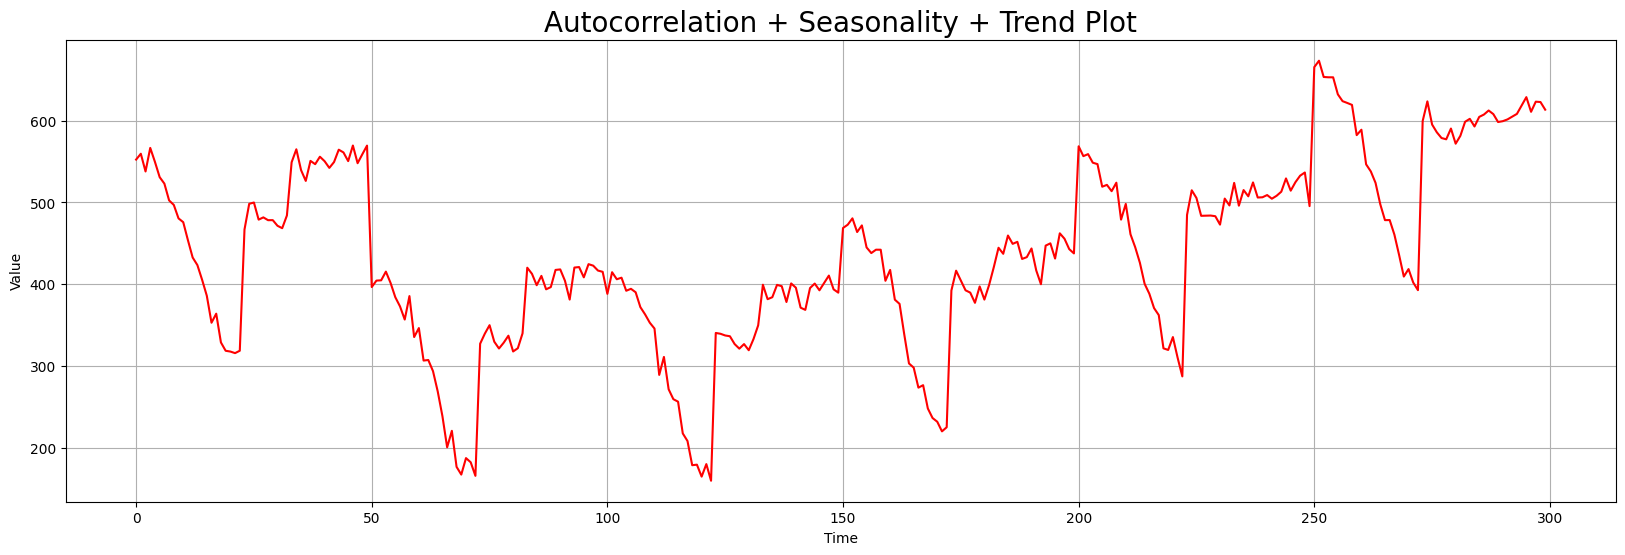

In [31]:
amplitude = 10
slope = 2
series = autocorrelation_1(time, amplitude, seed = RANDOM_SEED) + seasonality(time, period = 50, amplitude = 150) + trend(time, slope)
plt.figure(figsize = (20, 6))
plot_series(time[:300], series[:300], color = "red")
plt.title("Autocorrelation + Seasonality + Trend Plot", fontdict = {'fontsize' : 20})
plt.show()

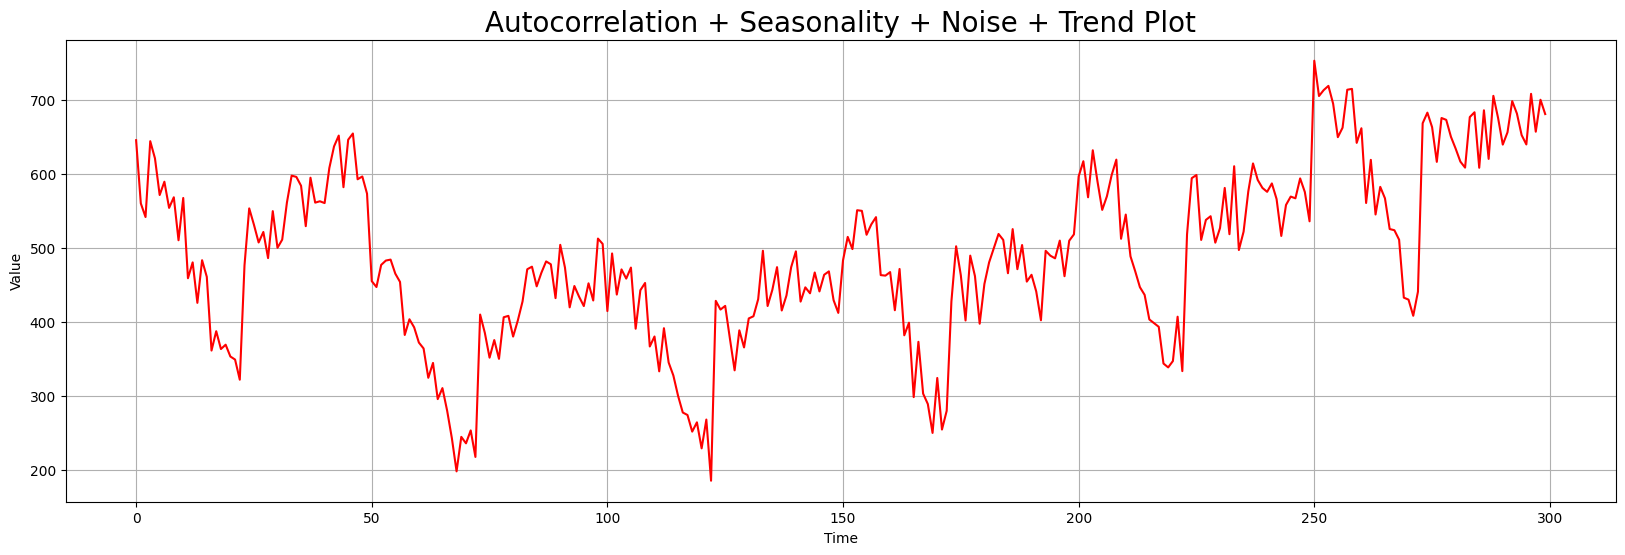

In [32]:
amplitude = 10
slope = 2
series = autocorrelation_1(time, amplitude, seed = RANDOM_SEED) + seasonality(time, period = 50, amplitude = 150) + trend(time, slope)
series += white_noise(time, noise_level = 100)
plt.figure(figsize = (20, 6))
plot_series(time[:300], series[:300], color = "red")
plt.title("Autocorrelation + Seasonality + Noise + Trend Plot", fontdict = {'fontsize' : 20})
plt.show()

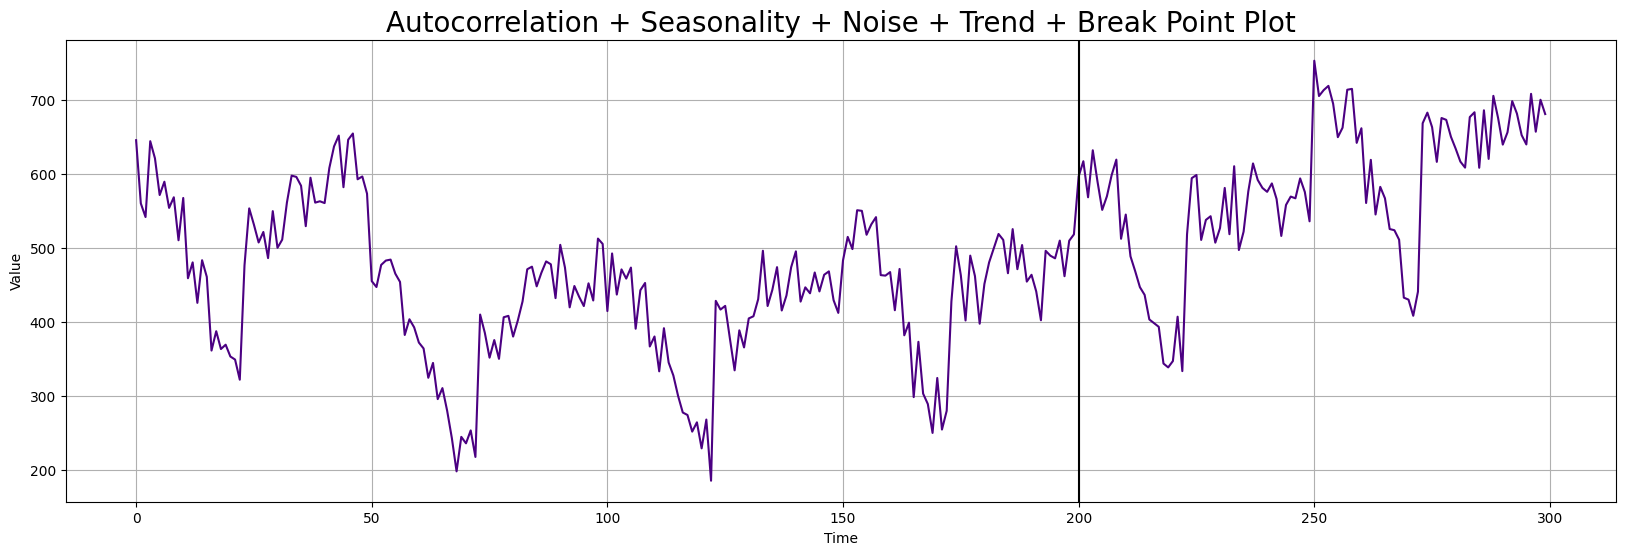

In [33]:
amplitude1 = 10
amplitude2 = 5
slope1 = 2
slope2 = -2
series1 = autocorrelation_2(time, amplitude1, seed = RANDOM_SEED) + seasonality(time, period = 50, amplitude = 150) + trend(time, slope1)
series2 = autocorrelation_2(time, amplitude2, seed = RANDOM_SEED) + seasonality(time, period = 50, amplitude = 2) + trend(time, slope2) + 750 + white_noise(time, 30)
series1[200:] = series2[200:]
series1 += white_noise(time, noise_level = 100, seed = RANDOM_SEED)
plt.figure(figsize = (20, 6))
plot_series(time[:300], series[:300], color = "indigo")
plt.axvline(x = 200, color = "black")
plt.title("Autocorrelation + Seasonality + Noise + Trend + Break Point Plot", fontdict = {'fontsize' : 20})
plt.show()